In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = 'C:/Users/Besitzer/Desktop/python csv/USA_Housing.csv'
df = pd.read_csv(data)


In [4]:
print("Top 5 rows of the dataframe:")
print(df.head())

Top 5 rows of the dataframe:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake 

In [5]:
print("Bottom 5 rows of the dataframe:")
print(df.tail())

Bottom 5 rows of the dataframe:
      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
4995                          3.46     22837.361035  1.060194e+06   
4996                          4.02     25616.115489  1.482618e+06   
4997                          2.13     33266.145490  1.030730e+06   
4998                          5.44     42625.620156  1.198657e+06   
4999                          4.07     46501.283803  1.298950e+06   

                                                Address  
4995                   USNS Williams\nFPO AP 30153

In [6]:
# Check out the info of your dataframe
print("Dataframe Info:")
df.info()

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
# Check out the summary of dataframe
print("Dataframe Summary:")
print(df.describe())

Dataframe Summary:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.

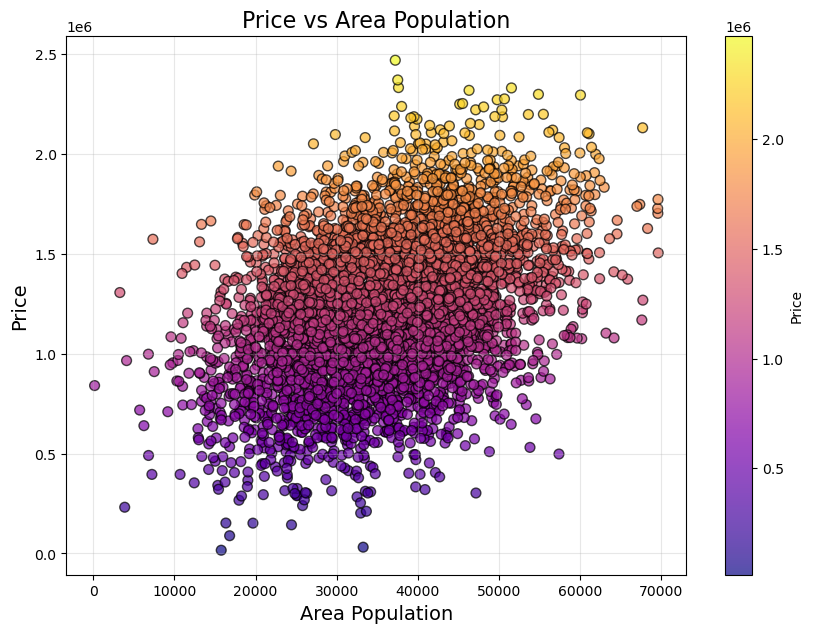

In [8]:
import matplotlib.pyplot as plt

# Plotting Price vs Area Population with improved design
plt.figure(figsize=(10, 7))
plt.scatter(
    df['Area Population'],  # X-axis: Area Population
    df['Price'],            # Y-axis: Price
    s=50,                   # Marker size
    c=df['Price'],          # Color of marker based on Price
    cmap='plasma',          # Colormap for gradient
    edgecolor='black',      # Black edge around markers
    alpha=0.7               # Transparency
)
plt.colorbar(label='Price')  # Add colorbar to indicate Price range
plt.title('Price vs Area Population', fontsize=16)
plt.xlabel('Area Population', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(alpha=0.3)          # Light grid for better readability
plt.show()


C:\Users\Besitzer\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


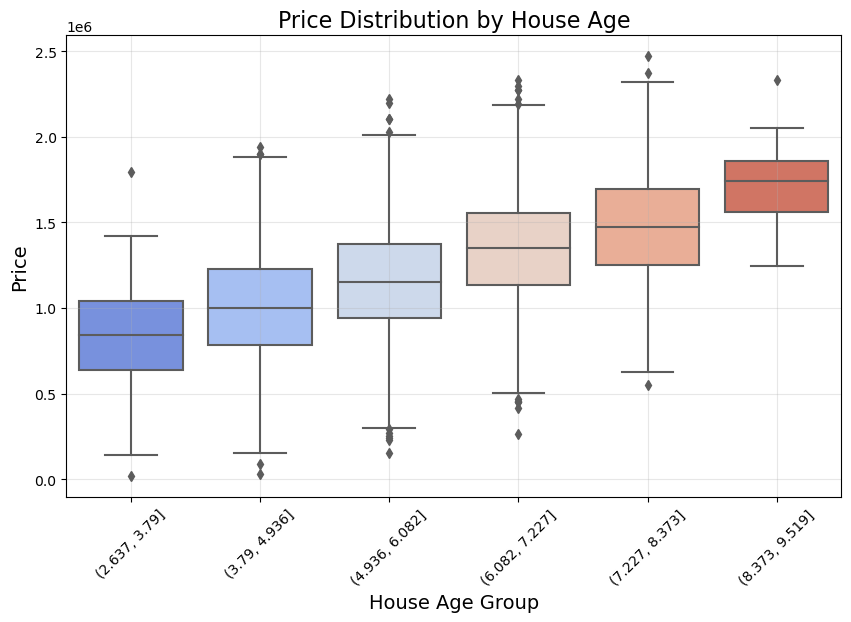

In [15]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(df['Avg. Area House Age'], bins=6), y=df['Price'], palette='coolwarm')

plt.title('Price Distribution by House Age', fontsize=16)
plt.xlabel('House Age Group', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()



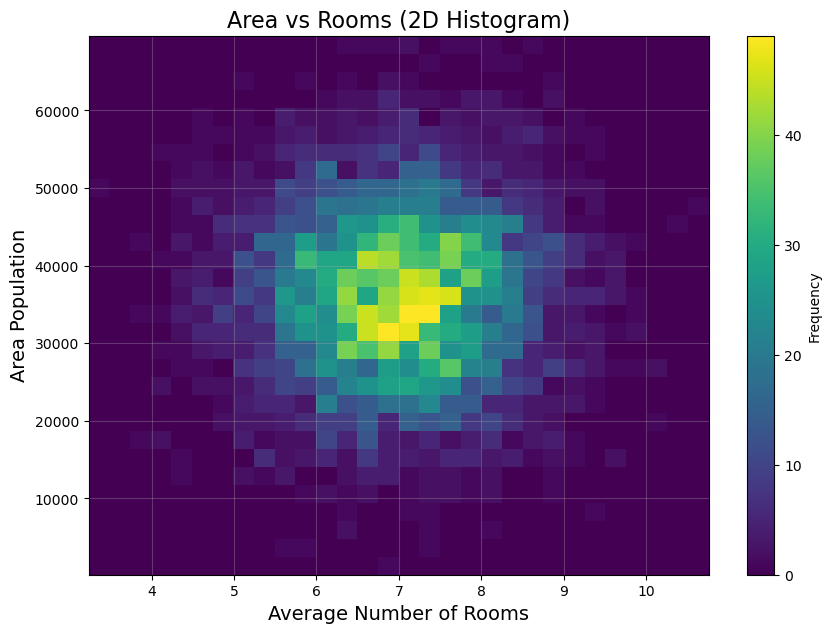

In [16]:
# 2D Histogram for Area vs Rooms
plt.figure(figsize=(10, 7))
plt.hist2d(
    df['Avg. Area Number of Rooms'],  # X-axis: Avg. Area Number of Rooms
    df['Area Population'],           # Y-axis: Area Population
    bins=(30, 30),                   # Number of bins for X and Y axes
    cmap='viridis'                   # Colormap for the histogram
)
plt.colorbar(label='Frequency')      # Add a colorbar to show frequency
plt.title('Area vs Rooms (2D Histogram)', fontsize=16)
plt.xlabel('Average Number of Rooms', fontsize=14)
plt.ylabel('Area Population', fontsize=14)
plt.grid(alpha=0.3)                  # Light grid for better readability
plt.show()


In [17]:
# Separate features and target variable
X = df[['Avg. Area Income', 'Avg. Area House Age', 
                  'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 
                  'Area Population']]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Root Mean Square Error (RMSE): 100444.0605555697
R² Score: 0.9179971706834579


In [14]:

average_price = df['Price'].mean()
median_price = df['Price'].median()

print(f" Average House Price: ${average_price:,.2f}")
print(f" Median House Price: ${median_price:,.2f}")



 Average House Price: $1,232,072.65
 Median House Price: $1,232,669.38
